In [5]:
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
import numpy as np

Загрузка датасета

In [6]:
california = fetch_california_housing()

Здесь датасет California housing преобразуется в объект типа DataFrame из библиотеки pandas. Добавляется столбец 'Price', содержащий целевую переменную, а затем выводятся первые несколько строк датафрейма с помощью метода head().

In [7]:
# Преобразование датасета в датафрейм
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Здесь формируются два датасета: price содержит целевую переменную, а data_without_price - признаки без целевой переменной. Затем создается объект модели линейной регрессии (LinearRegression), обучается на данных с помощью метода fit, и выводятся коэффициенты регрессии.

In [8]:
price = data['Price']
data_without_price = data.drop('Price', axis=1)

model = LinearRegression()
model.fit(data_without_price, price)

print("Коэффициент: \n", model.coef_)

Коэффициент: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


Здесь предсказанные значения цен помещаются в price_predict, затем строится график рассеяния (scatter plot) для визуализации предсказанных значений в сравнении с реальными значениями. Красная линия представляет идеальное соответствие предсказанных и реальных значений.

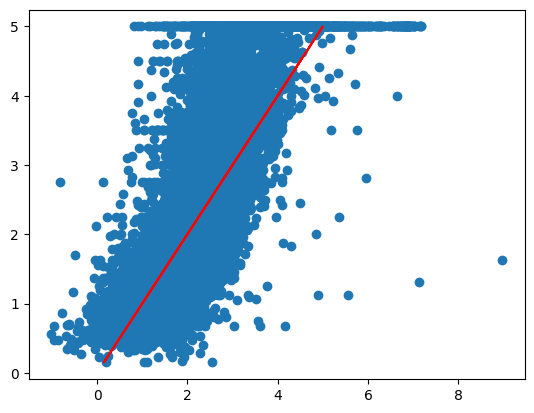

In [9]:
price_predict = model.predict(data_without_price)
plt.scatter(price_predict, price)
plt.plot(price, price, c='r')

Здесь создается полиномиальное преобразование признаков пятой степени с использованием PolynomialFeatures. Затем модель линейной регрессии обучается на преобразованных данных. Последние две строки создают предсказания и вычисляют коэффициент детерминации (R^2) для полиномиальной модели.

In [10]:
poly = PolynomialFeatures(5).fit_transform(data_without_price)
polynomial = LinearRegression()
polynomial.fit(poly, price)
data_without_price_poly = polynomial.predict(poly)
polynomial.score(poly, price)

0.7011196487580906

### Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

Text(0, 0.5, 'Остатки')

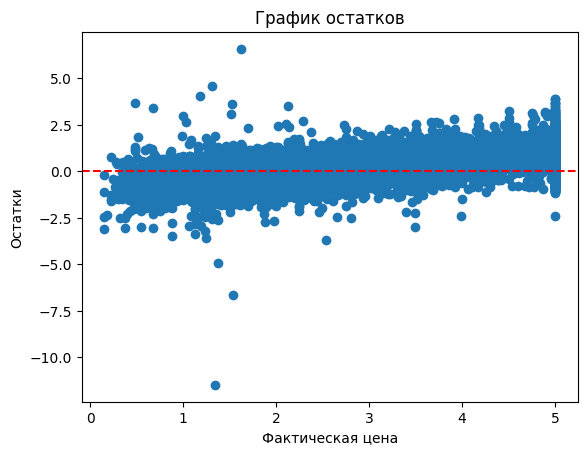

In [11]:
residuals = price - data_without_price_poly
plt.scatter(price, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков')
plt.xlabel('Фактическая цена')
plt.ylabel('Остатки')

### Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:
1. Метод опорных векторов
1.1 Без ядра
1.2 С гауссовым ядром
1.3 С полиномиальным ядром
2. Метод ближайших соседей
3. Многослойный перцептрон
4. Дерево решений

In [ ]:
# Метод опорных векторов (SVM) без ядра
svm_linear = SVR(kernel='linear')
svm_linear.fit(data_without_price, price)

# Метод опорных векторов (SVM) с гауссовым ядром
svm_rbf = SVR(kernel='rbf')
svm_rbf.fit(data_without_price, price)

# Метод опорных векторов (SVM) с полиномиальным ядром
svm_poly = SVR(kernel='poly')
svm_poly.fit(data_without_price, price)

# Метод ближайших соседей (KNN)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(data_without_price, price)

# Многослойный перцептрон (MLP)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(data_without_price, price)

# Дерево решений
tree = DecisionTreeRegressor()
tree.fit(data_without_price, price)


In [ ]:
# Визуализация регрессии для SVM без ядра
price_predict_svm_linear = svm_linear.predict(data_without_price)
plt.scatter(price_predict_svm_linear, price)
plt.plot(price, price, c='r')
plt.title('SVM (Linear) Regression')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()

# Оценка точности для SVM без ядра
mse_svm_linear = mean_squared_error(price, price_predict_svm_linear)
r2_svm_linear = r2_score(price, price_predict_svm_linear)
print(f'MSE for SVM (Linear): {mse_svm_linear}')
print(f'R^2 for SVM (Linear): {r2_svm_linear}')


### Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [ ]:
def train_and_evaluate_models(X, y):
    # Разделение данных на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Словарь для хранения результатов
    results = {}

    # Линейная регрессия
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_predictions = linear_model.predict(X_test)
    results['Linear Regression'] = {
        'MSE': mean_squared_error(y_test, linear_predictions),
        'R^2': r2_score(y_test, linear_predictions)
    }

    # Метод опорных векторов (SVM) без ядра
    svm_linear = SVR(kernel='linear')
    svm_linear.fit(X_train, y_train)
    svm_linear_predictions = svm_linear.predict(X_test)
    results['SVM (Linear)'] = {
        'MSE': mean_squared_error(y_test, svm_linear_predictions),
        'R^2': r2_score(y_test, svm_linear_predictions)
    }

    # Метод опорных векторов (SVM) с гауссовым ядром
    svm_rbf = SVR(kernel='rbf')
    svm_rbf.fit(X_train, y_train)
    svm_rbf_predictions = svm_rbf.predict(X_test)
    results['SVM (RBF)'] = {
        'MSE': mean_squared_error(y_test, svm_rbf_predictions),
        'R^2': r2_score(y_test, svm_rbf_predictions)
    }

    # Метод ближайших соседей (KNN)
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    results['KNN'] = {
        'MSE': mean_squared_error(y_test, knn_predictions),
        'R^2': r2_score(y_test, knn_predictions)
    }

    # Многослойный перцептрон (MLP)
    mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
    mlp.fit(X_train, y_train)
    mlp_predictions = mlp.predict(X_test)
    results['MLP'] = {
        'MSE': mean_squared_error(y_test, mlp_predictions),
        'R^2': r2_score(y_test, mlp_predictions)
    }

    # Дерево решений
    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)
    tree_predictions = tree.predict(X_test)
    results['Decision Tree'] = {
        'MSE': mean_squared_error(y_test, tree_predictions),
        'R^2': r2_score(y_test, tree_predictions)
    }

    return results

# Использование функции
results = train_and_evaluate_models(data_without_price, price)

# Вывод результатов
for model, metrics in results.items():
    print(f"{model}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R^2: {metrics['R^2']}")
    print()


### Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [ ]:
# Загрузка датасета diabetes
diabetes = load_diabetes()
data_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target_diabetes = diabetes.target

# Обучение модели линейной регрессии
model_diabetes = LinearRegression()
model_diabetes.fit(data_diabetes, target_diabetes)
print("Коэффициенты регрессии: \n", model_diabetes.coef_)

# Визуализация регрессии
price_predict_diabetes = model_diabetes.predict(data_diabetes)
plt.scatter(price_predict_diabetes, target_diabetes)
plt.plot(target_diabetes, target_diabetes, c='r')
plt.title('Linear Regression for Diabetes')
plt.xlabel('Predicted Diabetes Progression')
plt.ylabel('Actual Diabetes Progression')
plt.show()

# Создание полиномиальных признаков
poly_diabetes = PolynomialFeatures(5).fit_transform(data_diabetes)
polynomial_diabetes = LinearRegression()
polynomial_diabetes.fit(poly_diabetes, target_diabetes)
data_diabetes_poly = polynomial_diabetes.predict(poly_diabetes)

# Оценка остатков
residuals_diabetes = target_diabetes - data_diabetes_poly
plt.scatter(target_diabetes, residuals_diabetes)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot for Diabetes')
plt.xlabel('Actual Diabetes Progression')
plt.ylabel('Residuals')
plt.show()

# Обучение и оценка других моделей регрессии
def train_and_evaluate_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    results = {}

    # Линейная регрессия
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_predictions = linear_model.predict(X_test)
    results['Linear Regression'] = {
        'MSE': mean_squared_error(y_test, linear_predictions),
        'R^2': r2_score(y_test, linear_predictions)
    }

    # Метод опорных векторов (SVM) без ядра
    svm_linear = SVR(kernel='linear')
    svm_linear.fit(X_train, y_train)
    svm_linear_predictions = svm_linear.predict(X_test)
    results['SVM (Linear)'] = {
        'MSE': mean_squared_error(y_test, svm_linear_predictions),
        'R^2': r2_score(y_test, svm_linear_predictions)
    }

    # Метод опорных векторов (SVM) с гауссовым ядром
    svm_rbf = SVR(kernel='rbf')
    svm_rbf.fit(X_train, y_train)
    svm_rbf_predictions = svm_rbf.predict(X_test)
    results['SVM (RBF)'] = {
        'MSE': mean_squared_error(y_test, svm_rbf_predictions),
        'R^2': r2_score(y_test, svm_rbf_predictions)
    }

    # Метод ближайших соседей (KNN)
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    results['KNN'] = {
        'MSE': mean_squared_error(y_test, knn_predictions),
        'R^2': r2_score(y_test, knn_predictions)
    }

    # Многослойный перцептрон (MLP)
    mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
    mlp.fit(X_train, y_train)
    mlp_predictions = mlp.predict(X_test)
    results['MLP'] = {
        'MSE': mean_squared_error(y_test, mlp_predictions),
        'R^2': r2_score(y_test, mlp_predictions)
    }

    # Дерево решений
    tree = DecisionTreeRegressor()
    tree.fit(X_train, y_train)
    tree_predictions = tree.predict(X_test)
    results['Decision Tree'] = {
        'MSE': mean_squared_error(y_test, tree_predictions),
        'R^2': r2_score(y_test, tree_predictions)
    }

    return results

# Использование функции
results_diabetes = train_and_evaluate_models(data_diabetes, target_diabetes)

# Вывод результатов
for model, metrics in results_diabetes.items():
    print(f"{model}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R^2: {metrics['R^2']}")
    print()